Carga y Procesamiento de Datos

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


# Paso 1: Carga y preprocesamiento de datos
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Separa las etiquetas de los datos
X_train = train_data.drop(labels=["label"], axis=1)
Y_train = train_data["label"]

# Normaliza los valores de píxeles
X_train = X_train / 255.0

# Realiza un reshape para crear imágenes miniatura de 28x28
X_train = X_train.values.reshape(-1, 28, 28, 1)

DIVISION DE DATOS EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA

In [4]:
# Paso 2: División de datos en conjuntos de entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

CREACION Y ENTRENAMIENTO DE LA RED NEURONAL ARTIFICIAL ANN

In [5]:
# Paso 3: Creación y entrenamiento de la Red Neuronal Artificial (ANN)
# Creación del modelo ANN
ann_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Capa de salida con 10 neuronas
])
ann_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
1500/1500 [==============================] - 22s 11ms/step - loss: 0.2677 - accuracy: 0.9214 - val_loss: 0.1492 - val_accuracy: 0.9554
Epoch 2/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1145 - accuracy: 0.9661 - val_loss: 0.1023 - val_accuracy: 0.9696
Epoch 3/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0769 - accuracy: 0.9760 - val_loss: 0.0915 - val_accuracy: 0.9710
Epoch 4/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0592 - accuracy: 0.9812 - val_loss: 0.0899 - val_accuracy: 0.9745
Epoch 5/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0469 - accuracy: 0.9851 - val_loss: 0.0785 - val_accuracy: 0.9786
Epoch 6/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0386 - accuracy: 0.9872 - val_loss: 0.1012 - val_accuracy: 0.9694
Epoch 7/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0899 -

CREACION Y ENTRENAMIENTO DE LA RED NEURONAL CONVOLUCIONAL

In [6]:
# Paso 4: Creación y entrenamiento de la Red Neuronal Convolucional (CNN)
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 129s 83ms/step - loss: 0.1658 - accuracy: 0.9500 - val_loss: 0.0666 - val_accuracy: 0.9795
Epoch 2/10
1500/1500 [==============================] - 144s 96ms/step - loss: 0.0530 - accuracy: 0.9839 - val_loss: 0.0521 - val_accuracy: 0.9843
Epoch 3/10
1500/1500 [==============================] - 163s 109ms/step - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.0371 - val_accuracy: 0.9884
Epoch 4/10
1500/1500 [==============================] - 134s 89ms/step - loss: 0.0264 - accuracy: 0.9913 - val_loss: 0.0351 - val_accuracy: 0.9888
Epoch 5/10
1500/1500 [==============================] - 128s 85ms/step - loss: 0.0190 - accuracy: 0.9942 - val_loss: 0.0363 - val_accuracy: 0.9891
Epoch 6/10
1500/1500 [==============================] - 122s 81ms/step - loss: 0.0156 - accuracy: 0.9948 - val_loss: 0.0517 - val_accuracy: 0.9866
Epoch 7/10
1500/1500 [==============================] - 102s 68ms/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 

EVALUACION DE RENDIMIENTO EN EL CONJUNTO DE PRUEBA

In [7]:
# Paso 5: Evaluación de rendimiento en el conjunto de prueba
test_labels = test_data['label'].values
test_pixels = test_data.drop('label', axis=1).values
test_pixels = test_pixels / 255.0
test_pixels = test_pixels.reshape(-1, 28, 28, 1)


EVALUAAR LA ANN EN EL CONJUNTO DE PRUEBA ANN

In [8]:
# Evaluar la ANN en el conjunto de prueba
ann_predictions = ann_model.predict(test_pixels)
ann_predicted_labels = np.argmax(ann_predictions, axis=1)

correct_predictions = np.sum(ann_predicted_labels == test_labels)
total_predictions = len(test_labels)

ann_accuracy = correct_predictions / total_predictions
print(f'ANN - Accuracy: {ann_accuracy}')


313/313 [==============================] - 2s 4ms/step
ANN - Accuracy: 0.9766


EVALUAR LA CNN EN EL CONJUNTO DE PRUEBA

In [10]:
# Evaluar la CNN en el conjunto de prueba
cnn_predictions = cnn_model.predict(test_pixels)
cnn_predicted_labels = np.argmax(cnn_predictions, axis=1)

correct_predictions_cnn = np.sum(cnn_predicted_labels == test_labels)
total_predictions_cnn = len(test_labels)

cnn_accuracy = correct_predictions_cnn / total_predictions_cnn
print(f'CNN - Accuracy: {cnn_accuracy}')


313/313 [==============================] - 8s 24ms/step
CNN - Accuracy: 0.9904


##El modelo ANN tiene una precisión de aproximadamente 0.9776, lo que significa que clasifica correctamente alrededor del 97.44% de las imágenes del conjunto de prueba.

El modelo CNN tiene un rendimiento aún mejor, con una precisión de aproximadamente 0.991, lo que significa que clasifica correctamente alrededor del 98.98% de las imágenes del conjunto de prueba.

En términos de precisión, la CNN supera claramente al modelo ANN en este caso. Esto es típico en tareas de visión por computadora, donde las CNN suelen ser más efectivas para capturar patrones espaciales en las imágenes. La capacidad de las CNN para aprender características jerárquicas y la invarianza a la translación las hace especialmente adecuadas para tareas de clasificación de imágenes.

En resumen,  la precisión de la clasificación en imágenes, la CNN es la opción preferida en este caso.







In [2]:
X_train = train_data.drop(labels = ["label"],axis = 1)
Y_train = train_data["label"]

In [3]:
# Verificacion de las forma de datos
print("Forma de X_train:", X_train.shape)
print("Forma de Y_train:", Y_train.shape)

# Asegurando de que tengan la misma cantidad de muestras
if X_train.shape[0] != Y_train.shape[0]:
    print("Las cantidades de muestras en X_train y Y_train no coinciden.")
else:
    print("Las cantidades de muestras en X_train y Y_train coinciden.")

Forma de X_train: (60000, 784)
Forma de Y_train: (60000,)
Las cantidades de muestras en X_train y Y_train coinciden.


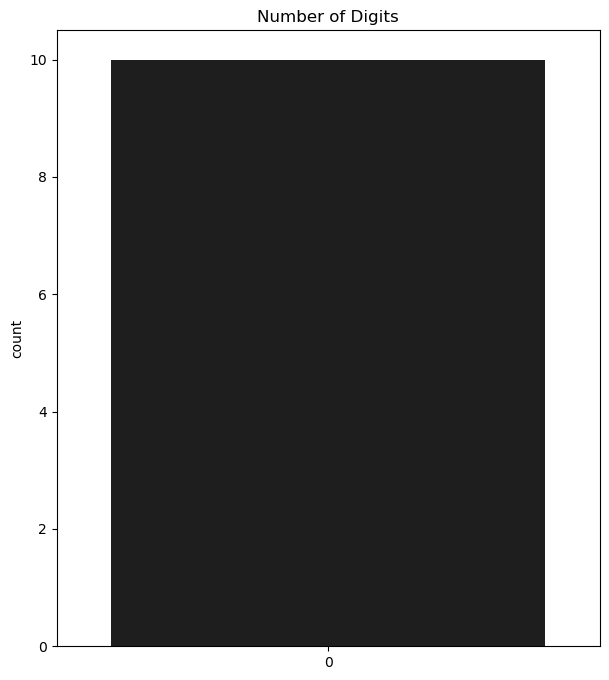

In [4]:
plt.figure(figsize = (7,8))
sns.countplot(Y_train.value_counts(),palette = "icefire")
plt.title("Number of Digits")
plt.show()


In [5]:
X_train = X_train / 255.0
print("X_train Shape :",X_train.shape)

X_train Shape : (60000, 784)


In [6]:
X_train = X_train.values.reshape(-1,28,28,1)
print("X_train Shape",X_train.shape)

X_train Shape (60000, 28, 28, 1)


In [7]:
Y_train = to_categorical(Y_train,num_classes = 10)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size = 0.1, random_state = 2)
print("X_train Shape:",X_train.shape)
print("X_val Shape:",X_val.shape)
print("Y_train Shape:",Y_train.shape)
print("Y_val Shape:",Y_val.shape)

X_train Shape: (54000, 28, 28, 1)
X_val Shape: (6000, 28, 28, 1)
Y_train Shape: (54000, 10)
Y_val Shape: (6000, 10)


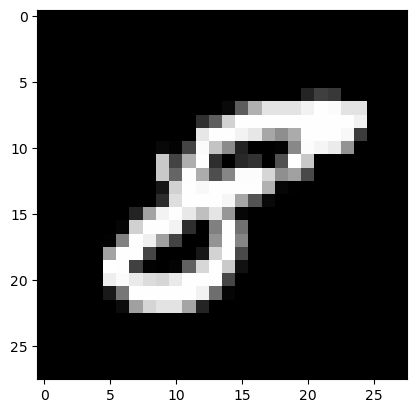

In [9]:
plt.imshow(X_train[4][:,:,0],cmap = "gray")
plt.show()

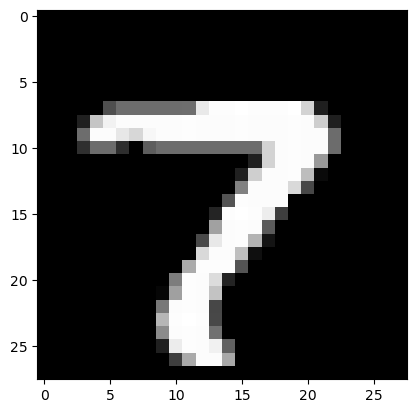

In [10]:
plt.imshow(X_train[3][:,:,0],cmap = "gray")
plt.show()

In [11]:
model = Sequential()

model.add(Conv2D(filters = 64 , kernel_size = (5,5) , padding = "same" , activation = "relu" , input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32 , kernel_size = (5,5) , padding = "same" , activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 64 , kernel_size = (5,5) , padding = "same" , activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 16 , kernel_size = (5,5) , padding = "same" , activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024,activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(Y_train.shape[1],activation = "softmax"))
model.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])


In [12]:
batch_size = 4000
epochs = 25

In [13]:
datagen =ImageDataGenerator(
shear_range = 0.2,
horizontal_flip = False,
vertical_flip = False,
rotation_range = 0.45,
zoom_range = 0.3,
zca_whitening = False) 

datagen.fit(X_train)

In [14]:
Y_val.shape

(6000, 10)

In [15]:
log = model.fit(X_train,Y_train,
                validation_data = (X_val,Y_val),
                epochs = epochs,
                batch_size = batch_size)

Epoch 1/25
14/14 [==============================] - 452s 32s/step - loss: 2.1494 - accuracy: 0.2029 - val_loss: 1.4422 - val_accuracy: 0.6543
Epoch 2/25
14/14 [==============================] - 495s 36s/step - loss: 1.2258 - accuracy: 0.5793 - val_loss: 0.6243 - val_accuracy: 0.8037
Epoch 3/25
14/14 [==============================] - 424s 30s/step - loss: 0.7304 - accuracy: 0.7500 - val_loss: 0.3676 - val_accuracy: 0.8977
Epoch 4/25
14/14 [==============================] - 437s 31s/step - loss: 0.5093 - accuracy: 0.8336 - val_loss: 0.2445 - val_accuracy: 0.9287
Epoch 5/25
14/14 [==============================] - 554s 40s/step - loss: 0.3844 - accuracy: 0.8787 - val_loss: 0.1853 - val_accuracy: 0.9452
Epoch 6/25
14/14 [==============================] - 512s 36s/step - loss: 0.3196 - accuracy: 0.8996 - val_loss: 0.1475 - val_accuracy: 0.9555
Epoch 7/25
14/14 [==============================] - 434s 31s/step - loss: 0.2736 - accuracy: 0.9144 - val_loss: 0.1251 - val_accuracy: 0.9628
Epoch 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


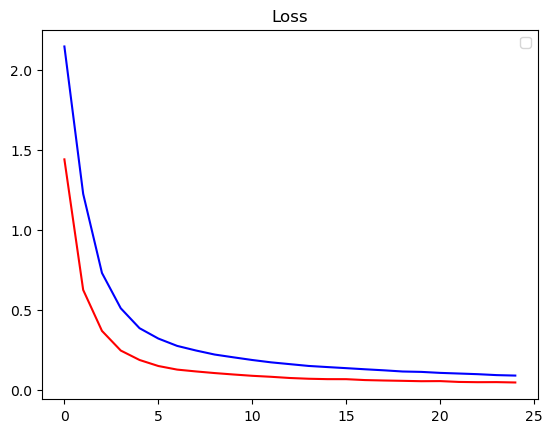

In [16]:
plt.plot(log.history["val_loss"],color = "red")


plt.plot(log.history["loss"],color = "blue")
plt.title("Loss")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


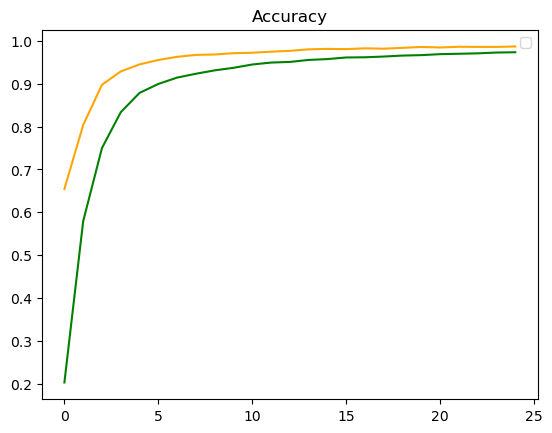

In [17]:
plt.plot(log.history["accuracy"],color = "green")
plt.plot(log.history["val_accuracy"],color = "orange")
plt.title("Accuracy")
plt.legend()
plt.show()